# Nyquist and Aliasing
<hr>`Ignore the imports`

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

# How to take samples
Provided a continuous time fucntion, continuous(t), where `t` is the continuous time frame.
<br>We can discretise the function by taking samples of the same function, discrete[n] = continuous(nT)
<br>`n` stands for the discrete sample space, [1,2,3,...]
<br>`T` stands for the sampling period.
<br>The basic idea here is to pick some discrete points from the continuous time signal and represent it as a discrete signal. 

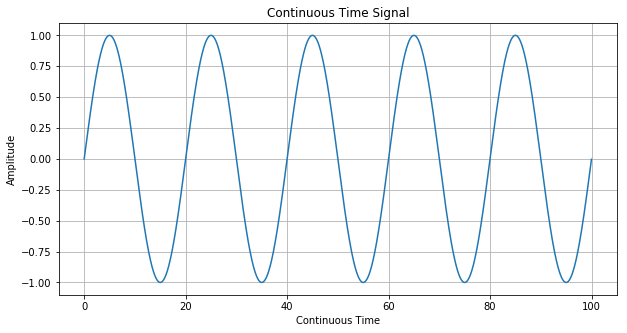

In [10]:
fig = plt.figure(figsize = (10,5)) #To enlarge the plot. [Ignore Code]

# t ranges from 0 to 100 with a step of 0.01
# n ranges from 0 to 100 with a step of 1
begin = 0
end = 100
t = np.arange(start = begin, stop = end, step = 0.01)
n = np.arange(start = begin, stop = end, step = 1)

# the continuous time signal cont
cont = {}
# Frequency 0.05 Hz
# each second -> 0.05 oscillation
# 20 seconds -> 1 oscillation

# To make the continuous time signal
for i in t:
    cont[i] = np.sin(2*np.pi*0.05*i)
x,y = zip(*cont.items())
plt.plot(x,y)
plt.xlabel("Continuous Time")
plt.ylabel("Amplitude")
plt.title("Continuous Time Signal")
plt.grid()

# Sampled Discrete Signal

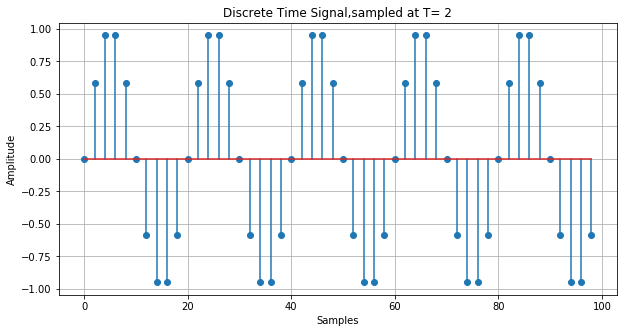

In [21]:
fig = plt.figure(figsize = (10,5)) #To enlarge the plot. [Ignore Code]

# the discrete time signal dist
dis = {}
# Sampled at T = 2, T being the Sampling Time Period
# This basically defines the time instants after which the continuous signal is sampled.
# Feel free to change T and look at the plot plotted below
T = 2
for i in n:
    if T*i < end:
        dis[T*i] = cont[T*i]
x,y = zip(*dis.items())
plt.stem(x,y)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Discrete Time Signal,sampled at T= "+str(T))
plt.grid()

# Sampling Frequency
<hr>
The symbol `T` which was refered to as the sampling time period, when inversed is called the smapling rate `fs` [fs= 1/T]
<br>Now let us consider a static sampling frequency
<br>fs = 1 Hz
<br>This depicts that the continuous signal will be sampled per second.
<br>Had it been fs=2, the continuous signal would have been sampled per two seconds.

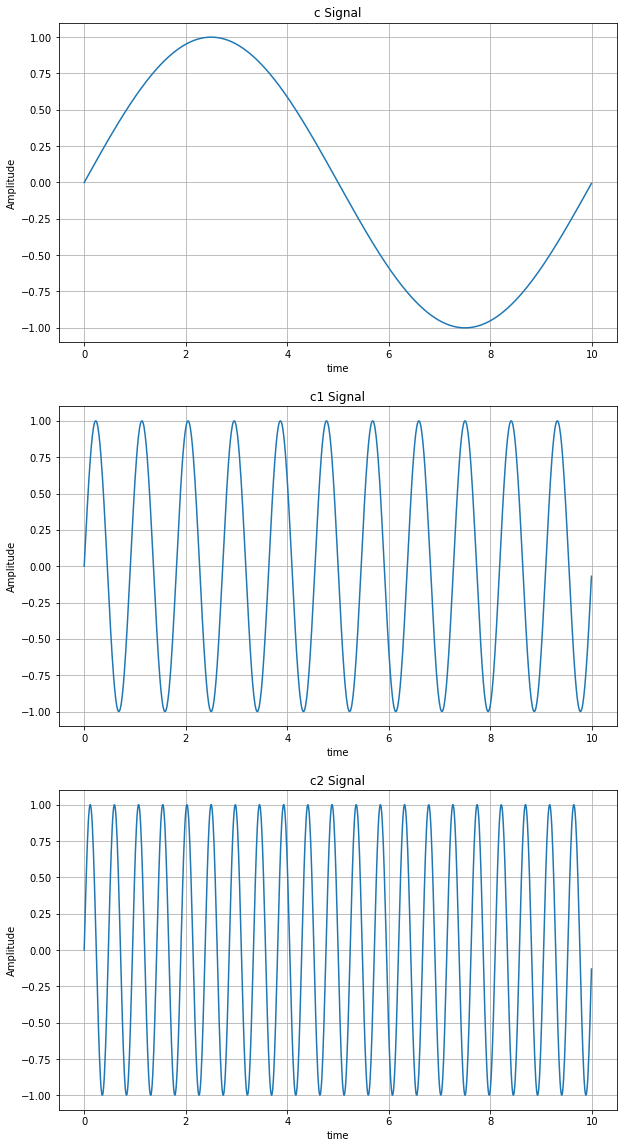

In [24]:
fig = plt.figure(figsize = (10,20)) # Hack again
# sampling rate frequency is set to be 1 Hz
fs = 1

begin = 0
end = 10
t = np.arange(start = begin, stop = end, step = 0.01)
n = np.arange(start = begin, stop = end, step = 1)

# EXPREMINETAL SETUP
# c,c1,c2 are continuous time signals with different frequencies
# c has a frequency as 0.1Hz
# c1 has a frequency as 0.1Hz + fs
# c2 has a frequency as 0.1Hz + 2*fs
c = {}
c1 = {}
c2 = {}
for i in t:
    c[i] = np.sin(2*np.pi*0.1*i)
    c1[i] = np.sin(2*np.pi*(0.1)*i + 2*np.pi*(1*fs)*i)
    c2[i] = np.sin(2*np.pi*0.1*i + 2*np.pi*(2*fs)*i)
x,y = zip(*c.items())
x1,y1 = zip(*c1.items())
x2,y2 = zip(*c2.items())
plt.subplot(3,1,1)
plt.plot(x,y)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c Signal")
plt.grid()

plt.subplot(3,1,2)
plt.plot(x1,y1)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c1 Signal")
plt.grid()

plt.subplot(3,1,3)
plt.plot(x2,y2)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c2 Signal")
plt.grid()


# Let's sample them shall we?

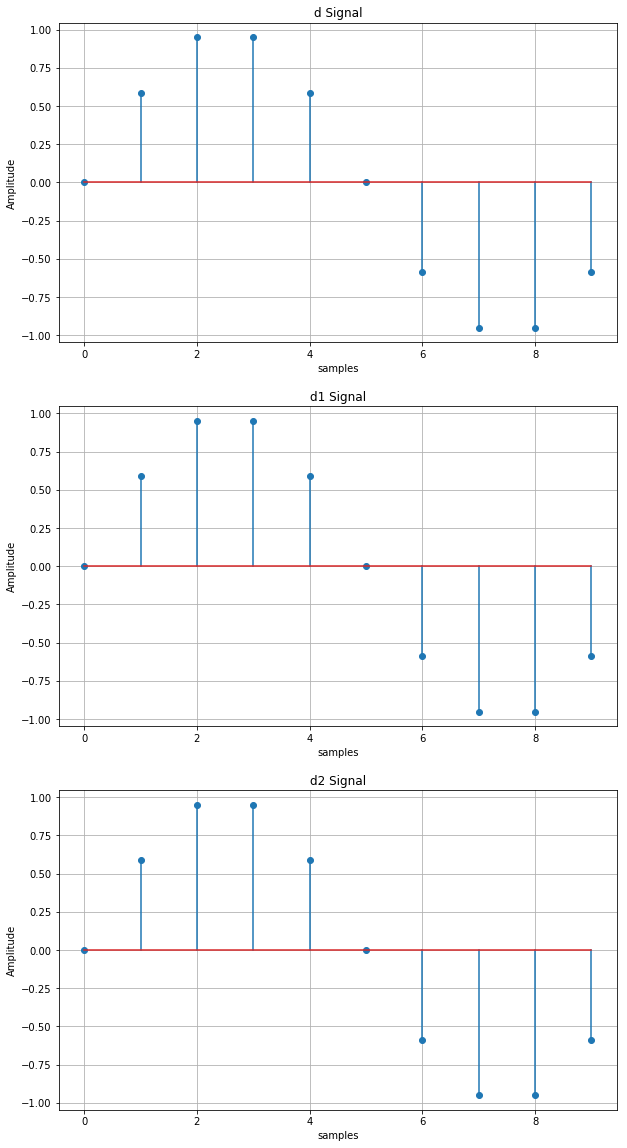

In [26]:
fig = plt.figure(figsize = (10,20)) # Hack again
d = {}
d1 = {}
d2 = {}
# Sampled at T = 1/fs
T = 1//fs
for i in n:
    if T*i < end:
        d[T*i] = c[T*i]
        d1[T*i] = c1[T*i]
        d2[T*i] = c2[T*i]
x,y = zip(*d.items())
x1,y1 = zip(*d1.items())
x2,y2 = zip(*d2.items())
plt.subplot(3,1,1)
plt.stem(x,y)
plt.xlabel("samples")
plt.ylabel("Amplitude")
plt.title("d Signal")
plt.grid()

plt.subplot(3,1,2)
plt.stem(x1,y1)
plt.xlabel("samples")
plt.ylabel("Amplitude")
plt.title("d1 Signal")
plt.grid()

plt.subplot(3,1,3)
plt.stem(x2,y2)
plt.xlabel("samples")
plt.ylabel("Amplitude")
plt.title("d2 Signal")
plt.grid()


# Everything is hazy:
I wanted everyone to get confused at this instant.<br>
Now the curtain raiser.<br>
>The experimental setup was done with 3 unique analog signal, unique with its frequencies<br>
The analog signals had frequencies `0.1, 0.1+fs, 0.1+2*fs` <br>
When we simply wanted to discretise all the continuous signals with the sampling rate of fs<br>
What we found was, all the discrete signals were same<br>
This was a burning issue back then and is now, we can confuse ourselves with the thought of an analog signal with any discrete signal even without knowing the true origin.

Nyquist says, whenever we take samples at a sampling rate of `fs` we alias all the continuous signals that have frequencies lesser than that of `half of fs`.
<br>fs = 1Hz
<br>fs/2 = 0.5Hz
<br>The frequencies i took for the analog signal were, `0.1, 1.1, 2.1` where 1.1 and 2.1 are greater than 0.5. This experimental setup proves what Nyquist has said.
<hr>

# Let's make Nyquist proud
<hr>c to c8 are all continuous signals with different frequencies.
<br>All the frequencies are well thought about.
<br>fs/2 = 0.5
<br>Hence I have taken frequencies greter than 0.5 namely, [0.6,0.7,0.8,0.9]
<br>I have also taken frequencies that when sampled gives us the same discrete signal as [0.6,0.7,0.8,0.9]

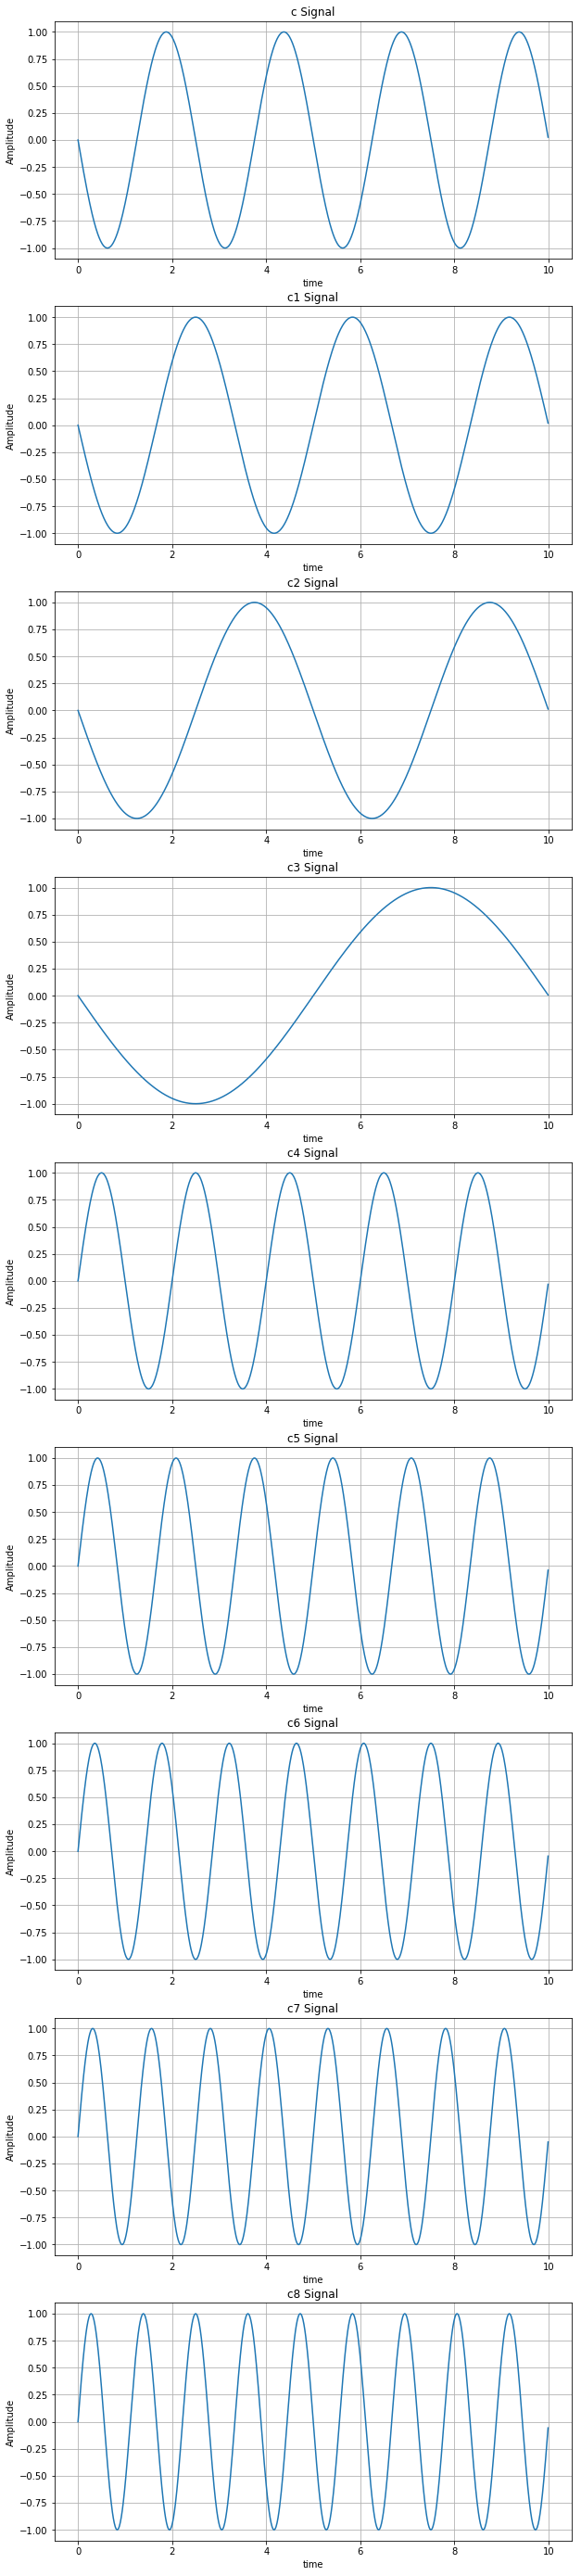

In [33]:
fig = plt.figure(figsize = (10,50)) # Hack again
# fs = 1Hz
fs = 1

begin = 0
end = 10
t = np.arange(start = begin, stop = end, step = 0.01)
n = np.arange(start = begin, stop = end, step = 1)

c = {}
c1 = {}
c2 = {}
c3 = {}
c4 = {}
c5 = {}
c6 = {}
c7 = {}
c8 = {}
for i in t:
    c[i] = np.sin(2*np.pi*(-0.4)*i)
    c1[i] = np.sin(2*np.pi*(-0.3)*i)
    c2[i] = np.sin(2*np.pi*(-0.2)*i)
    c3[i] = np.sin(2*np.pi*(-0.1)*i)
    c4[i] = np.sin(2*np.pi*0.5*i)
    c5[i] = np.sin(2*np.pi*0.6*i)
    c6[i] = np.sin(2*np.pi*0.7*i)
    c7[i] = np.sin(2*np.pi*0.8*i)
    c8[i] = np.sin(2*np.pi*0.9*i)
x,y = zip(*c.items())
x1,y1 = zip(*c1.items())
x2,y2 = zip(*c2.items())
x3,y3 = zip(*c3.items())
x4,y4 = zip(*c4.items())
x5,y5 = zip(*c5.items())
x6,y6 = zip(*c6.items())
x7,y7 = zip(*c7.items())
x8,y8 = zip(*c8.items())
plt.subplot(9,1,1)
plt.plot(x,y)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c Signal")
plt.grid()

plt.subplot(9,1,2)
plt.plot(x1,y1)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c1 Signal")
plt.grid()

plt.subplot(9,1,3)
plt.plot(x2,y2)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c2 Signal")
plt.grid()

plt.subplot(9,1,4)
plt.plot(x3,y3)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c3 Signal")
plt.grid()

plt.subplot(9,1,5)
plt.plot(x4,y4)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c4 Signal")
plt.grid()

plt.subplot(9,1,6)
plt.plot(x5,y5)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c5 Signal")
plt.grid()

plt.subplot(9,1,7)
plt.plot(x6,y6)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c6 Signal")
plt.grid()

plt.subplot(9,1,8)
plt.plot(x7,y7)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c7 Signal")
plt.grid()

plt.subplot(9,1,9)
plt.plot(x8,y8)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.title("c8 Signal")
plt.grid()


# Each and every analog signal seems to be different
> The fs = 1
<br>
Nyquist talks about fs/2
<br>
fs/2 = 0.5
I have particularly taken frequnecies greater than 0.5
<br>
`0.6,0.7,0.8,0.9`
<br>
Let us consider `k` to be `1` here, `k` is any generic `integer` and `fs` is `1` given <br>
(-0.4) + k(fs) = 0.6
<br>(-0.3) + k(fs) = 0.7
<br>(-0.2) + k(fs) = 0.8
<br>(-0.1) + k(fs) = 0.9
<br>
This is the sole reason why i have also taken `-0.4,-0.3,-0.2,-0.1` as frequencies

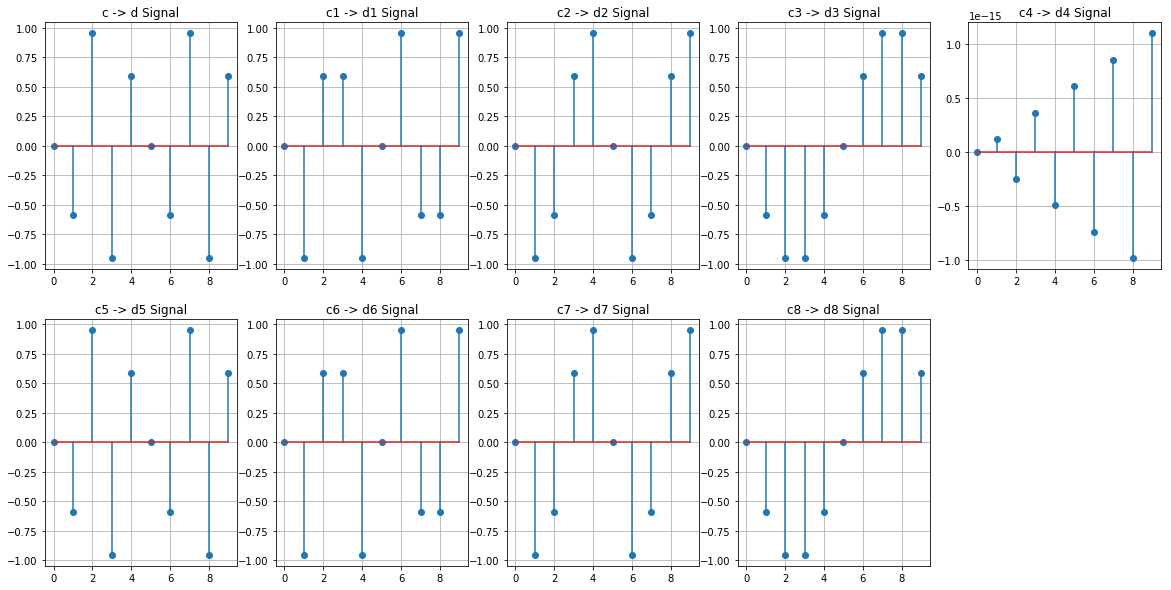

In [40]:
fig = plt.figure(figsize=(20,10)) #Hack again
# Sampling all the continuous signals c to c8
d = {}
d1 = {}
d2 = {}
d3 = {}
d4 = {}
d5 = {}
d6 = {}
d7 = {}
d8 = {}
# Sampled at T = 1/fs
T = 1//fs
for i in n:
    if T*i < end:
        d[T*i] = c[T*i]
        d1[T*i] = c1[T*i]
        d2[T*i] = c2[T*i]
        d3[T*i] = c3[T*i]
        d4[T*i] = c4[T*i]
        d5[T*i] = c5[T*i]
        d6[T*i] = c6[T*i]
        d7[T*i] = c7[T*i]
        d8[T*i] = c8[T*i]
x,y = zip(*d.items())
x1,y1 = zip(*d1.items())
x2,y2 = zip(*d2.items())
x3,y3 = zip(*d3.items())
x4,y4 = zip(*d4.items())
x5,y5 = zip(*d5.items())
x6,y6 = zip(*d6.items())
x7,y7 = zip(*d7.items())
x8,y8 = zip(*d8.items())
plt.subplot(2,5,1)
plt.stem(x,y)

plt.title("c -> d Signal")
plt.grid()

plt.subplot(2,5,2)
plt.stem(x1,y1)
plt.title("c1 -> d1 Signal")
plt.grid()

plt.subplot(2,5,3)
plt.stem(x2,y2)

plt.title("c2 -> d2 Signal")
plt.grid()

plt.subplot(2,5,4)
plt.stem(x3,y3)

plt.title("c3 -> d3 Signal")
plt.grid()

plt.subplot(2,5,5)
plt.stem(x4,y4)
plt.title("c4 -> d4 Signal")
plt.grid()

plt.subplot(2,5,6)
plt.stem(x5,y5)

plt.title("c5 -> d5 Signal")
plt.grid()

plt.subplot(2,5,7)
plt.stem(x6,y6)

plt.title("c6 -> d6 Signal")
plt.grid()

plt.subplot(2,5,8)
plt.stem(x7,y7)

plt.title("c7 -> d7 Signal")
plt.grid()

plt.subplot(2,5,9)
plt.stem(x8,y8)

plt.title("c8 -> d8 Signal")
plt.grid()

# Plots Description
These are the discretized plots of the continuous time signal [c to c8].<br>
What we notice is that, the discretised signals with frequencies f that is `greater than fs/2` are not unique. There is a definite frequency that can be aliased to this signal.
This means that, if we sample at a rate `fs` where the frequency of the analog signal is `greater than fs/2` then it is equivalent to another continuous time signal with a frequency of [f - (k)fs]